## Observations and Insights 

In [2]:
# Dependencies and Setup
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results,on='Mouse ID', how='outer')
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the DataFrame.
mice_num=data["Mouse ID"].nunique()
trial_num=data["Mouse ID"].count()
print(mice_num)
print(trial_num)

249
1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateID = data[data.duplicated(['Mouse ID', 'Timepoint'])]
duplicateID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
g989=data[data['Mouse ID']=='g989']
clean_data=data.drop(g989.index)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_num1=clean_data["Mouse ID"].nunique()
trial_num1=clean_data["Mouse ID"].count()
print(mice_num1)
print(trial_num1)

248
1880


## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#average
avg=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
avg=pd.DataFrame(avg)
avg.reset_index(inplace=True)
avg.columns=['Drug Regimen','Average']
avg.sort_values('Drug Regimen')
avg

,Drug Regimen,Average
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [8]:
#mode
cap = clean_data[clean_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'].mode().max()

cef = clean_data[clean_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'].mode().max()

infu = clean_data[clean_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'].mode().max()

ket = clean_data[clean_data['Drug Regimen'] == 'Ketapril']['Tumor Volume (mm3)'].mode().max()

naf = clean_data[clean_data['Drug Regimen'] == 'Naftisol']['Tumor Volume (mm3)'].mode().max()

plac = clean_data[clean_data['Drug Regimen'] == 'Placebo']['Tumor Volume (mm3)'].mode().max()

prop = clean_data[clean_data['Drug Regimen'] == 'Propriva']['Tumor Volume (mm3)'].mode().max()

rami = clean_data[clean_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'].mode().max()

stel = clean_data[clean_data['Drug Regimen'] == 'Stelasyn']['Tumor Volume (mm3)'].mode().max()

zon = clean_data[clean_data['Drug Regimen'] == 'Zoniferol']['Tumor Volume (mm3)'].mode().max()

mod=pd.DataFrame({'Drug Regimen':['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'],
                  'Tumor Volume Mode':[cap,cef,infu,ket,naf,plac,prop,rami,stel,zon]})

mod.columns=['Drug Regimen','Mode']
mod.sort_values('Drug Regimen')


,Drug Regimen,Mode
0,Capomulin,45.0
1,Ceftamin,45.0
2,Infubinol,45.0
3,Ketapril,45.0
4,Naftisol,45.0
5,Placebo,45.0
6,Propriva,45.0
7,Ramicane,45.0
8,Stelasyn,45.0
9,Zoniferol,45.0


In [9]:
#median
medval=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
medval=pd.DataFrame(medval)
medval.reset_index(inplace=True)
medval.columns=['Drug Regimen','Median']
medval.sort_values('Drug Regimen')


,Drug Regimen,Median
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.446266
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [10]:
#std
std_tv=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_tv=pd.DataFrame(std_tv)
std_tv.reset_index(inplace=True)
std_tv.columns=['Drug Regimen','Standar Deviation']
std_tv.sort_values('Drug Regimen')


,Drug Regimen,Standar Deviation
0,Capomulin,4.994774
1,Ceftamin,6.268188
2,Infubinol,6.567243
3,Ketapril,8.279709
4,Naftisol,8.134708
5,Placebo,7.821003
6,Propriva,6.622085
7,Ramicane,4.846308
8,Stelasyn,7.710419
9,Zoniferol,6.966589


In [11]:
#variance
var_tv=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
var_tv=pd.DataFrame(var_tv)
var_tv.reset_index(inplace=True)
var_tv.columns=['Drug Regimen','Variance']
var_tv.sort_values('Drug Regimen')

,Drug Regimen,Variance
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.852013
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [12]:
#SEM
SEM=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
SEM=pd.DataFrame(SEM)
SEM.reset_index(inplace=True)
SEM.columns=['Drug Regimen','SEM']
SEM.sort_values('Drug Regimen')

,Drug Regimen,SEM
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.544332
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [13]:
summary_stats = pd.merge(avg,mod, on="Drug Regimen",how="left")
summary_stats = pd.merge(summary_stats,medval, on="Drug Regimen",how="left")
summary_stats = pd.merge(summary_stats,std_tv, on="Drug Regimen",how="left")
summary_stats = pd.merge(summary_stats,var_tv, on="Drug Regimen",how="left")
summary_stats = pd.merge(summary_stats,SEM, on="Drug Regimen",how="left")
summary_stats

,Drug Regimen,Average,Mode,Median,Standar Deviation,Variance,SEM
0,Capomulin,40.675741,45.0,41.557809,4.994774,24.947764,0.329346
1,Ceftamin,52.591172,45.0,51.776157,6.268188,39.290177,0.469821
2,Infubinol,52.884795,45.0,51.820584,6.567243,43.128684,0.492236
3,Ketapril,55.235638,45.0,53.698743,8.279709,68.553577,0.603860
4,Naftisol,54.331565,45.0,52.509285,8.134708,66.173479,0.596466
5,Placebo,54.033581,45.0,52.288934,7.821003,61.168083,0.581331
6,Propriva,52.320930,45.0,50.446266,6.622085,43.852013,0.544332
7,Ramicane,40.216745,45.0,40.673236,4.846308,23.486704,0.320955
8,Stelasyn,54.233149,45.0,52.431737,7.710419,59.450562,0.573111
9,Zoniferol,53.236507,45.0,51.818479,6.966589,48.533355,0.516398


## Bar Plots

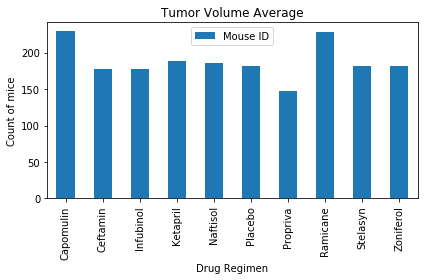

In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mice_dr=clean_data.groupby('Drug Regimen')['Mouse ID'].count()
mice_dr=pd.DataFrame(mice_dr)

mice_dr_chart = mice_dr.plot(kind="bar", title="Tumor Volume Average")
mice_dr_chart.set_xlabel("Drug Regimen")
mice_dr_chart.set_ylabel("Count of mice")
plt.tight_layout()

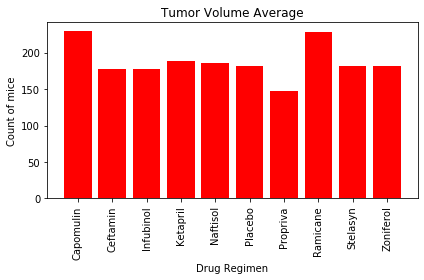

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mice_dr1=clean_data.groupby('Drug Regimen')['Mouse ID'].count()
mice_dr1=pd.DataFrame(mice_dr1)
mice_dr1.reset_index(inplace=True)
mice_dr1.columns=['Drug Regimen','Mouse ID']
mice_dr1.sort_values('Drug Regimen')
#print(mice_dr1)
plt.bar(mice_dr1['Drug Regimen'], mice_dr1['Mouse ID'], color='r')
plt.xticks(rotation=90)
plt.title("Tumor Volume Average")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of mice")
plt.tight_layout()

## Pie Plots

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
MvF=clean_data.groupby('Sex')['Mouse ID'].count()
sex_chart=pd.DataFrame(MvF)


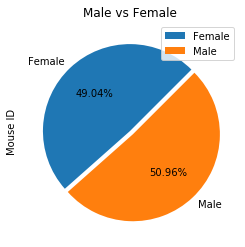

In [22]:
explode = (0, 0.05)
tags=sex_chart.keys()
mice_pie = sex_chart.plot(kind="pie",explode=explode, autopct='%.2f%%',y=tags, title=("Male vs Female"),startangle=45)

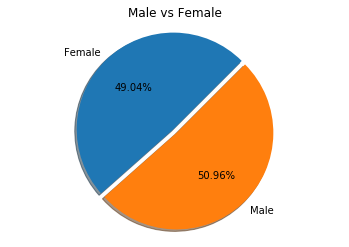

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_chart1=pd.DataFrame(MvF)
sex_chart1.reset_index(inplace=True)
sex_chart1.columns=['Sex','Count']


plt.title("Male vs Female")
plt.pie(sex_chart1['Count'], labels=sex_chart1['Sex'],explode=explode, autopct="%.2f%%", shadow=True, startangle=45)
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#clean_data_s=clean_data.sort_values('Mouse ID')
final_tumor = clean_data.groupby('Mouse ID').nth(-1)
final_tumor_s=final_tumor.sort_values(['Drug Regimen','Tumor Volume (mm3)'])

final_tumor_s

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,45,23.343598,1
m601,Capomulin,Male,22,17,45,28.430964,1
x401,Capomulin,Female,16,15,45,28.484033,0
f966,Capomulin,Male,16,17,20,30.485985,0
u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...
g296,Zoniferol,Female,14,29,45,68.163195,4
w575,Zoniferol,Female,16,28,45,68.401286,3
q511,Zoniferol,Female,2,28,45,68.611061,3


In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor2 = final_tumor_s.groupby('Drug Regimen').min()
x=final_tumor2.sort_values('Tumor Volume (mm3)')
x

,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,
Ramicane,Female,1,16,5,22.050126,0
Capomulin,Female,1,15,10,23.343598,0
Infubinol,Female,1,23,5,36.321346,0
Ceftamin,Female,2,25,0,45.000000,0
Ketapril,Female,1,25,0,45.000000,0
Naftisol,Female,2,25,0,45.000000,0
Placebo,Female,1,25,0,45.000000,0
Propriva,Female,1,25,0,45.000000,0
Stelasyn,Female,1,25,0,45.000000,0


In [26]:
#Capomulin
Capom = final_tumor_s[final_tumor_s['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
quartiles1 = Capom.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
print(f"The lower quartile of Tumor volume is: {lowerq1}")
print(f"The upper quartile of Tumor volume is: {upperq1}")
print(f"The interquartile range of Tumor volume is: {iqr1}")
print(f"The the median of Tumor volume is: {quartiles1[0.5]} ")
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

The lower quartile of Tumor volume is: 32.37735684
The upper quartile of Tumor volume is: 40.1592203
The interquartile range of Tumor volume is: 7.781863460000004
The the median of Tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [27]:
#Ramicane
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")
Rami = final_tumor_s[final_tumor_s['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
quartiles2 = Rami.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
print(f"The lower quartile of Tumor volume is: {lowerq2}")
print(f"The upper quartile of Tumor volume is: {upperq2}")
print(f"The interquartile range of Tumor volume is: {iqr2}")
print(f"The the median of Tumor volume is: {quartiles2[0.5]} ")
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Tumor volume is: 31.56046955
The upper quartile of Tumor volume is: 40.65900627
The interquartile range of Tumor volume is: 9.098536719999998
The the median of Tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [28]:
#Infubinol
Infu = final_tumor_s[final_tumor_s['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
quartiles3 = Infu.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
print(f"The lower quartile of Tumor volume is: {lowerq3}")
print(f"The upper quartile of Tumor volume is: {upperq3}")
print(f"The interquartile range of Tumor volume is: {iqr3}")
print(f"The the median of Tumor volume is: {quartiles3[0.5]} ")
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")

The lower quartile of Tumor volume is: 54.04860769
The upper quartile of Tumor volume is: 65.52574285
The interquartile range of Tumor volume is: 11.477135160000003
The the median of Tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [29]:
#Ceftamin
Ceft = final_tumor_s[final_tumor_s['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
quartiles4 = Ceft.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
print(f"The lower quartile of Tumor volume is: {lowerq4}")
print(f"The upper quartile of Tumor volume is: {upperq4}")
print(f"The interquartile range of Tumor volume is: {iqr4}")
print(f"The the median of Tumor volume is: {quartiles4[0.5]} ")
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")

The lower quartile of Tumor volume is: 48.72207785
The upper quartile of Tumor volume is: 64.29983003
The interquartile range of Tumor volume is: 15.577752179999997
The the median of Tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


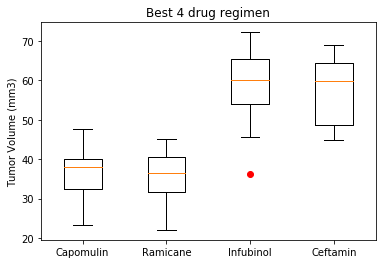

In [30]:
plt.title('Best 4 drug regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.boxplot([Capom,Rami,Infu,Ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],sym='ro')
plt.show()

## Line and Scatter Plots

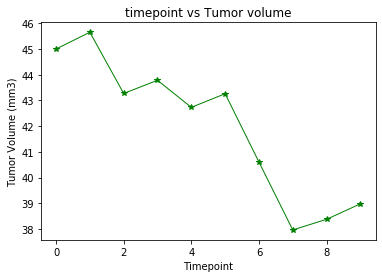

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mice_capo=clean_data[clean_data['Drug Regimen']=='Capomulin']
nwdt=mice_capo.groupby(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].mean()
nwdt_df=pd.DataFrame(nwdt)
b128=nwdt_df.head(10)
xx=b128.reset_index()
new_b128=xx[['Timepoint','Tumor Volume (mm3)']]

plt.title("timepoint vs Tumor volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(new_b128['Tumor Volume (mm3)'], marker="*", color="green", linewidth=1)
plt.show()

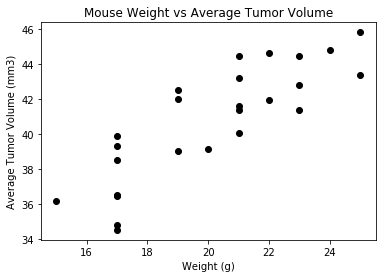

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_capo=clean_data[clean_data['Drug Regimen']=='Capomulin']
nw_dt=mice_capo.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()
nw_dt_df=pd.DataFrame(nw_dt)
y=nw_dt_df.reset_index()

plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(y['Weight (g)'], y['Tumor Volume (mm3)'], marker="o", color="black")
plt.show()

## Correlation and Regression

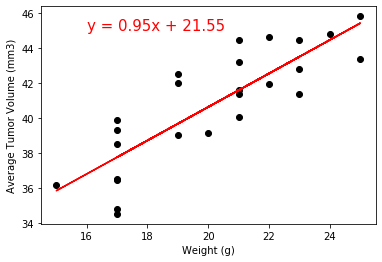

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(y['Weight (g)'], y['Tumor Volume (mm3)'])
regress_values = y['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(y['Weight (g)'], y['Tumor Volume (mm3)'], marker="o", color="black")
plt.plot(y['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(16,45),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
